C:\Users\Amir\AppData\Local\Temp\ipykernel_11132\3469551737.py:13: FutureWarning: TensorMesh.plotGrid has been deprecated, please use TensorMesh.plot_grid. It will be removed in version 1.0.0 of discretize.
  mesh.plotGrid(showIt=True)
C:\Users\Amir\AppData\Roaming\Python\Python39\site-packages\discretize\utils\code_utils.py:313: FutureWarning: showIt has been deprecated, please use show_it
  return getattr(self, new_name)(*args, **kwargs)


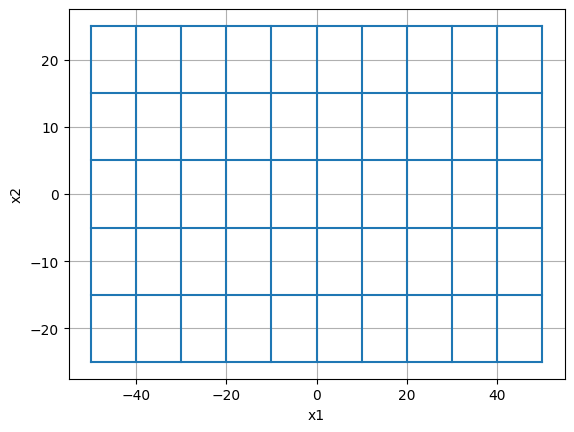

In [8]:
from discretize import TensorMesh
import numpy as np
import matplotlib.pyplot as plt

nx, ny = 10, 5
hx = np.ones(nx) * 10  
hy = np.ones(ny) * 10 

# Create the 2D TensorMesh
mesh = TensorMesh([hx, hy], x0="CC")

# Visualize the mesh
mesh.plotGrid(showIt=True)
plt.show()


C:\Users\Amir\AppData\Local\Temp\ipykernel_11132\2024470451.py:8: FutureWarning: TensorMesh.plotGrid has been deprecated, please use TensorMesh.plot_grid. It will be removed in version 1.0.0 of discretize.
  mesh_3D.plotGrid(showIt=True)
C:\Users\Amir\AppData\Roaming\Python\Python39\site-packages\discretize\utils\code_utils.py:313: FutureWarning: showIt has been deprecated, please use show_it
  return getattr(self, new_name)(*args, **kwargs)


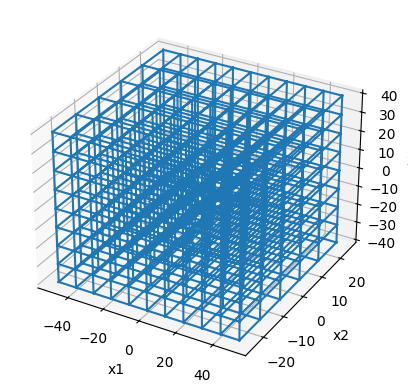

In [9]:
nz = 8
hz = np.ones(nz) * 10  # 8 cells, each 10 units deep in the z-direction

# Create the 3D TensorMesh
mesh_3D = TensorMesh([hx, hy, hz], x0="CCC")

# Visualize the 3D mesh
mesh_3D.plotGrid(showIt=True)
plt.show()


## Mathematical Formulas for Topographic Surface

### Meshgrid Creation

The meshgrid is created by generating 41 evenly spaced points between -200 and 200 for both the x and y axes:

$$
x_{\text{topo}} = \text{linspace}(-200, 200, 41)
$$

$$
y_{\text{topo}} = \text{linspace}(-200, 200, 41)
$$

### Topographic Surface Calculation

The z-values of the topographic surface are calculated using the following formula:

$$
z_{\text{topo}} = -15 \times \exp\left(-\frac{x_{\text{topo}}^2 + y_{\text{topo}}^2}{80^2}\right) + 100 + 0.5 \times \text{rand}(x_{\text{topo}}.shape)
$$

- The first term represents a Gaussian function centered at the origin, with an amplitude of -15.
- The second term adds a constant offset of 100 units.
- The third term adds random noise to the surface, scaled by 0.5.


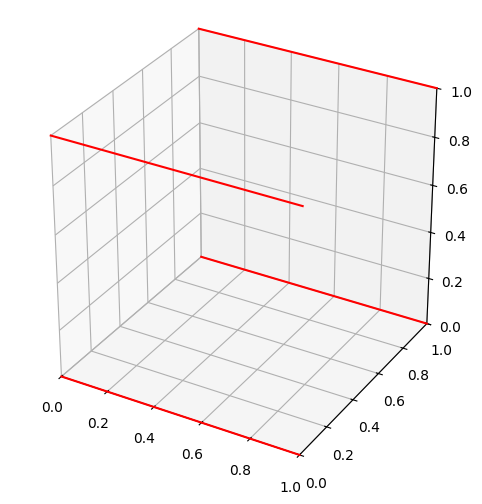

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a simple 3D plot (a cube)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Plot a simple cube
ax.plot([0, 1], [0, 0], [0, 0], color="r")
ax.plot([0, 1], [1, 1], [0, 0], color="r")
ax.plot([0, 1], [0, 0], [1, 1], color="r")
ax.plot([0, 1], [1, 1], [1, 1], color="r")
# ax.set_box_aspect(aspect=None)  # Automatic scaling
ax.set_box_aspect(aspect=(1, 1, 1))  # Equal scaling

plt.savefig('c.png')



plt.show()


Core Cell Width (in meters):

$$
\text{Core Cell Width} = 5 \, \text{m}
$$


Gravity Anomaly Contribution from a Single Voxel:

$$
\Delta g_i = \text{Kernel Function}(i) \times \rho_i
$$


Total Gravity Anomaly:

$$
\Delta g = \sum_{i=1}^{N} \Delta g_i = \sum_{i=1}^{N} \left( \text{Kernel Function}(i) \times \rho_i \right)
$$


Padding Cell Width:

$$
\text{Padding Cell Width} = \text{Variable}
$$


Cell Dimensions:

$$
\text{Cell Dimensions} = \Delta x \times \Delta y \times \Delta z
$$

Where:

$$
\Delta x, \, \Delta y, \, \Delta z \text{ are the lengths of the cell in the x, y, and z directions, respectively.}
$$


## Core Cell Width (in meters)

$$
\text{Core Cell Width} = 5 \, \text{m}
$$


### Uniform Cell Sizes

- **Cell size for all cells**: 

$$
\Delta x_i = dh
$$

- **Total length covered by these cells**: 

$$
L = n \times dh
$$


### Decreasing Cell Sizes (Negative Growth Factor)

- **Cell size for the \(i\)-th cell**: 

$$
\Delta x_i = dh \times g^{i-1}
$$

Where \( g \) is the reciprocal of the growth factor \( g = \frac{1}{1.3} \).

- **Total length covered**: 

$$
L = dh \times \frac{1 - g^n}{1 - g}
$$


### Increasing Cell Sizes (Positive Growth Factor)

- **Cell size for the \(i\)-th cell**: 

$$
\Delta x_i = dh \times g^{i-1}
$$

Where \( g = 1.3 \) is the growth factor.

- **Total length covered**: 

$$
L = dh \times \frac{g^n - 1}{g - 1}
$$


### Example 1: Uniform Cell Sizes

- **Cell Size**: 

$$
\Delta x_i = 5.0 \, \text{meters}
$$

- **Number of Cells**: 40.

- **Total Length Covered**: 

$$
L = 40 \times 5.0 = 200 \, \text{meters}
$$


### Example 2: Decreasing Cell Sizes (Negative Growth Factor)

- **Growth Factor**: 

$$
g = \frac{1}{1.3} \approx 0.769
$$

- **Cell Sizes**:

$$
\Delta x_1 = 5.0 \, \text{meters}
$$

$$
\Delta x_2 = 5.0 \times 0.769 \approx 3.85 \, \text{meters}
$$

$$
\Delta x_3 = 5.0 \times 0.769^2 \approx 2.96 \, \text{meters}
$$

$$
\Delta x_4 = 5.0 \times 0.769^3 \approx 2.28 \, \text{meters}
$$

$$
\Delta x_5 = 5.0 \times 0.769^4 \approx 1.75 \, \text{meters}
$$

- **Total Length Covered**:

$$
L = 5.0 \times \frac{1 - 0.769^5}{1 - 0.769} \approx 15.84 \, \text{meters}
$$


### Example 3: Increasing Cell Sizes (Positive Growth Factor)

- **Growth Factor**: 

$$
g = 1.3
$$

- **Cell Sizes**:

$$
\Delta x_1 = 5.0 \, \text{meters}
$$

$$
\Delta x_2 = 5.0 \times 1.3 \approx 6.5 \, \text{meters}
$$

$$
\Delta x_3 = 5.0 \times 1.3^2 \approx 8.45 \, \text{meters}
$$

$$
\Delta x_4 = 5.0 \times 1.3^3 \approx 10.99 \, \text{meters}
$$

$$
\Delta x_5 = 5.0 \times 1.3^4 \approx 14.29 \, \text{meters}
$$

- **Total Length Covered**:

$$
L = 5.0 \times \frac{1.3^5 - 1}{1.3 - 1} \approx 45.23 \, \text{meters}
$$


C:\Users\Amir\AppData\Local\Temp\ipykernel_11132\4121071962.py:21: FutureWarning: TensorMesh.plotGrid has been deprecated, please use TensorMesh.plot_grid. It will be removed in version 1.0.0 of discretize.
  mesh.plotGrid(ax=ax)


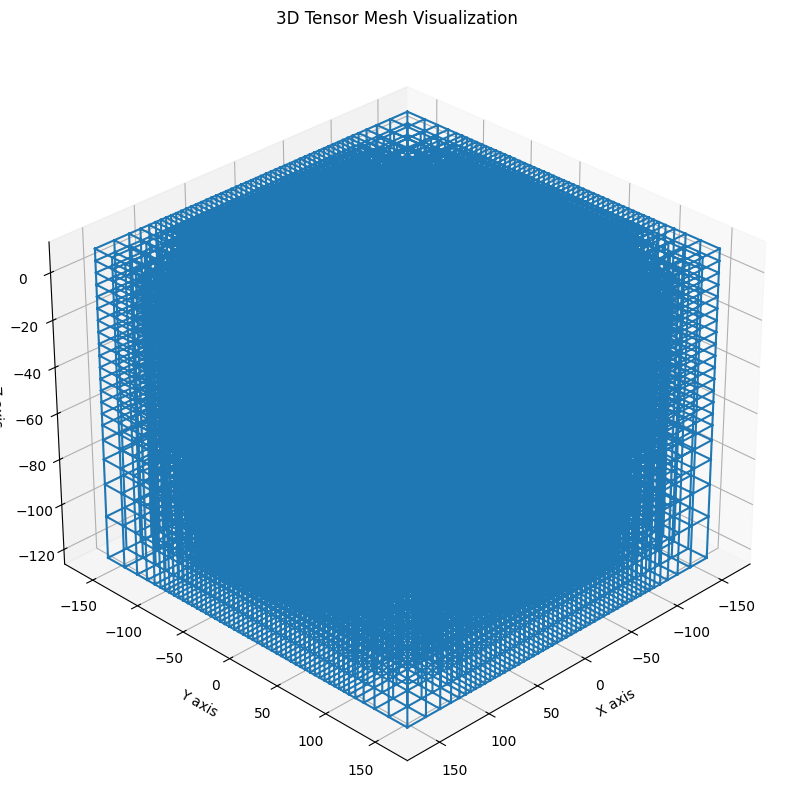

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from discretize import TensorMesh

# Parameters from your code
dh = 5.0
hx = [(dh, 5, -1.3), (dh, 40), (dh, 5, 1.3)]
hy = [(dh, 5, -1.3), (dh, 40), (dh, 5, 1.3)]
hz = [(dh, 5, -1.3), (dh, 15)]
mesh = TensorMesh([hx, hy, hz], "CCN")

# Shift vertically to align the top with the maximum topography
z_topo_max = 10  # Replace this with your actual z_topo.max() value
mesh.origin += np.r_[0.0, 0.0, z_topo_max]

# Plot the mesh grid
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the grid on the 3D axis
mesh.plotGrid(ax=ax)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Tensor Mesh Visualization')

# Adjust the view angle for better visibility
ax.view_init(elev=30, azim=45)

plt.show()


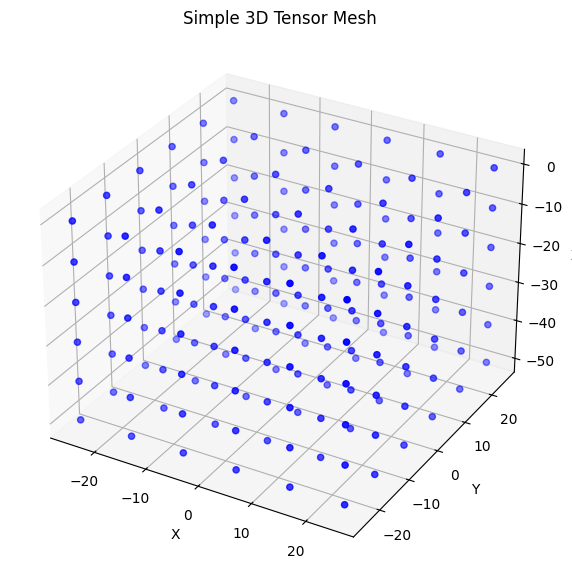

In [24]:
import numpy as np
from discretize import TensorMesh
import matplotlib.pyplot as plt

# Simple mesh parameters
dh = 10.0
hx = [(dh, 5)]  # 5 cells of size 10m in the x-direction
hy = [(dh, 5)]  # 5 cells of size 10m in the y-direction
hz = [(dh, 5)]  # 5 cells of size 10m in the z-direction

# Create a tensor mesh
mesh = TensorMesh([hx, hy, hz], "CCN")

# Visualize the mesh
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Get the mesh nodes
X, Y, Z = np.meshgrid(mesh.nodes_x, mesh.nodes_y, mesh.nodes_z, indexing="ij")

# Plot the mesh grid
ax.scatter(X, Y, Z, color='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Simple 3D Tensor Mesh')

plt.show()


### 1. **Data Misfit**

The data misfit $\phi_d$ is defined as:

$$
\phi_d(m) = \frac{1}{2} \sum_{i=1}^N \left( \frac{d_i^{\text{obs}} - d_i^{\text{pred}}(m)}{\sigma_i} \right)^2
$$

Where:

- $d_i^{\text{obs}}$: Observed data
- $d_i^{\text{pred}}(m)$: Predicted data for model $m$
- $\sigma_i$: Data uncertainties
- $N$: Number of data points

### 2. **Sensitivity Weighting**

The sensitivity weighting $W_s$ applied to the model $m$:

$$
\phi_s(m) = \frac{1}{2} \| W_s (m - m_{\text{ref}}) \|^2
$$

Where:

- $W_s$: Sensitivity weighting matrix
- $m_{\text{ref}}$: Reference model

### 3. **Trade-off Parameter (Beta)**

The trade-off parameter $\beta$ balances the data misfit $\phi_d$ and the model regularization $\phi_m$:

$$
\Phi(m) = \phi_d(m) + \beta \phi_m(m)
$$

The initial value of $\beta$ is often estimated using the largest eigenvalue $\lambda_{\max}$ of the matrix $\mathbf{J}^\top \mathbf{J}$ (Jacobian):

$$
\beta_0 = \lambda_{\max}
$$

### 4. **Preconditioning**

The Jacobi preconditioner $M^{-1}$ is applied as follows:

$$
M^{-1} = \text{diag} \left( \mathbf{J}^\top \mathbf{J} + \beta \mathbf{I} \right)
$$

Where:

- $M$: Preconditioning matrix
- $\mathbf{J}$: Jacobian matrix
- $\mathbf{I}$: Identity matrix
